In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical




##Data Analysis,Preprocessing and Deep Learning Model - 1

In [ ]:

credit_data=pd.read_csv('/content/credit_risk_data.csv',
                 index_col=False,
                 delimiter=',')
credit_data

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


In [ ]:
# data frame shape
print('Number of rows: ', credit_data.shape[0])
print('Number of columns: ', credit_data.shape[1])

Number of rows:  45000
Number of columns:  43


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [ ]:
# percentage of missing values per feature
print((credit_data.isnull().sum() * 100 / credit_data.shape[0]).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [ ]:
credit_data.dropna(subset=['target_default'], inplace=True)

In [ ]:
credit_data.drop('target_fraud', axis=1, inplace=True)

In [ ]:
# number of unique observations per column
credit_data.nunique().sort_values()

channel                                                 1
external_data_provider_credit_checks_last_2_year        1
last_borrowed_in_months                                 2
target_default                                          2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
real_state                                              5
n_defaulted_loans                                       5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

In [ ]:
# drop the columns "channel" and "external_data_provider_credit_checks_last_2_year"
credit_data.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

In [ ]:
credit_data.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [ ]:
# show descriptive statistics
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
score_3,41741.0,3.464598e+02,110.102271,0.000000,270.000000,340.000000,420.000000,9.900000e+02
score_4,41741.0,1.000068e+02,3.183821,86.191572,97.862546,100.017950,102.143100,1.139782e+02
score_5,41741.0,4.994161e-01,0.288085,0.000035,0.251595,0.500174,0.747630,9.999734e-01
score_6,41741.0,9.991940e+01,10.022703,60.663039,93.182517,99.977774,106.630991,1.421924e+02
risk_rate,41741.0,2.944510e-01,0.101561,0.000000,0.220000,0.290000,0.360000,9.000000e-01
last_amount_borrowed,14133.0,1.332810e+04,7918.698433,1005.180000,7210.280000,12011.050000,18030.160000,3.505960e+04
last_borrowed_in_months,14133.0,4.058841e+01,9.437936,36.000000,36.000000,36.000000,36.000000,6.000000e+01
credit_limit,28632.0,3.387722e+04,36141.985884,0.000000,9975.000000,25213.000000,46492.500000,4.482690e+05
income,41741.0,7.108012e+04,52259.780013,4821.180000,44019.580000,60044.090000,85032.890000,5.000028e+06
ok_since,17276.0,3.519217e+01,21.629577,0.000000,17.000000,32.000000,50.000000,1.410000e+02


In [ ]:
# count of "inf" values in "reported_income"
np.isinf(credit_data['reported_income']).sum()

66

In [ ]:
# count of values = -999 in "external_data_provider_email_seen_before"
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before']

28      -999.0
38      -999.0
118     -999.0
134     -999.0
357     -999.0
         ...  
44295   -999.0
44317   -999.0
44475   -999.0
44485   -999.0
44804   -999.0
Name: external_data_provider_email_seen_before, Length: 591, dtype: float64

In [ ]:
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

-999.0    591
Name: external_data_provider_email_seen_before, dtype: int64

In [ ]:
# replace "inf" values with "nan"
credit_data['reported_income'] = credit_data['reported_income'].replace(np.inf, np.nan)

# replace "-999" values with "nan"
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [ ]:
# data frame containing numerical features
credit_data_numerical = credit_data[['score_3', 'risk_rate', 'last_amount_borrowed',
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since',
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
                                 'external_data_provider_email_seen_before']]

<ipython-input-59-a59be332cf50>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data_numerical[i], bins=15,kde=False, ax=ax[r][c])


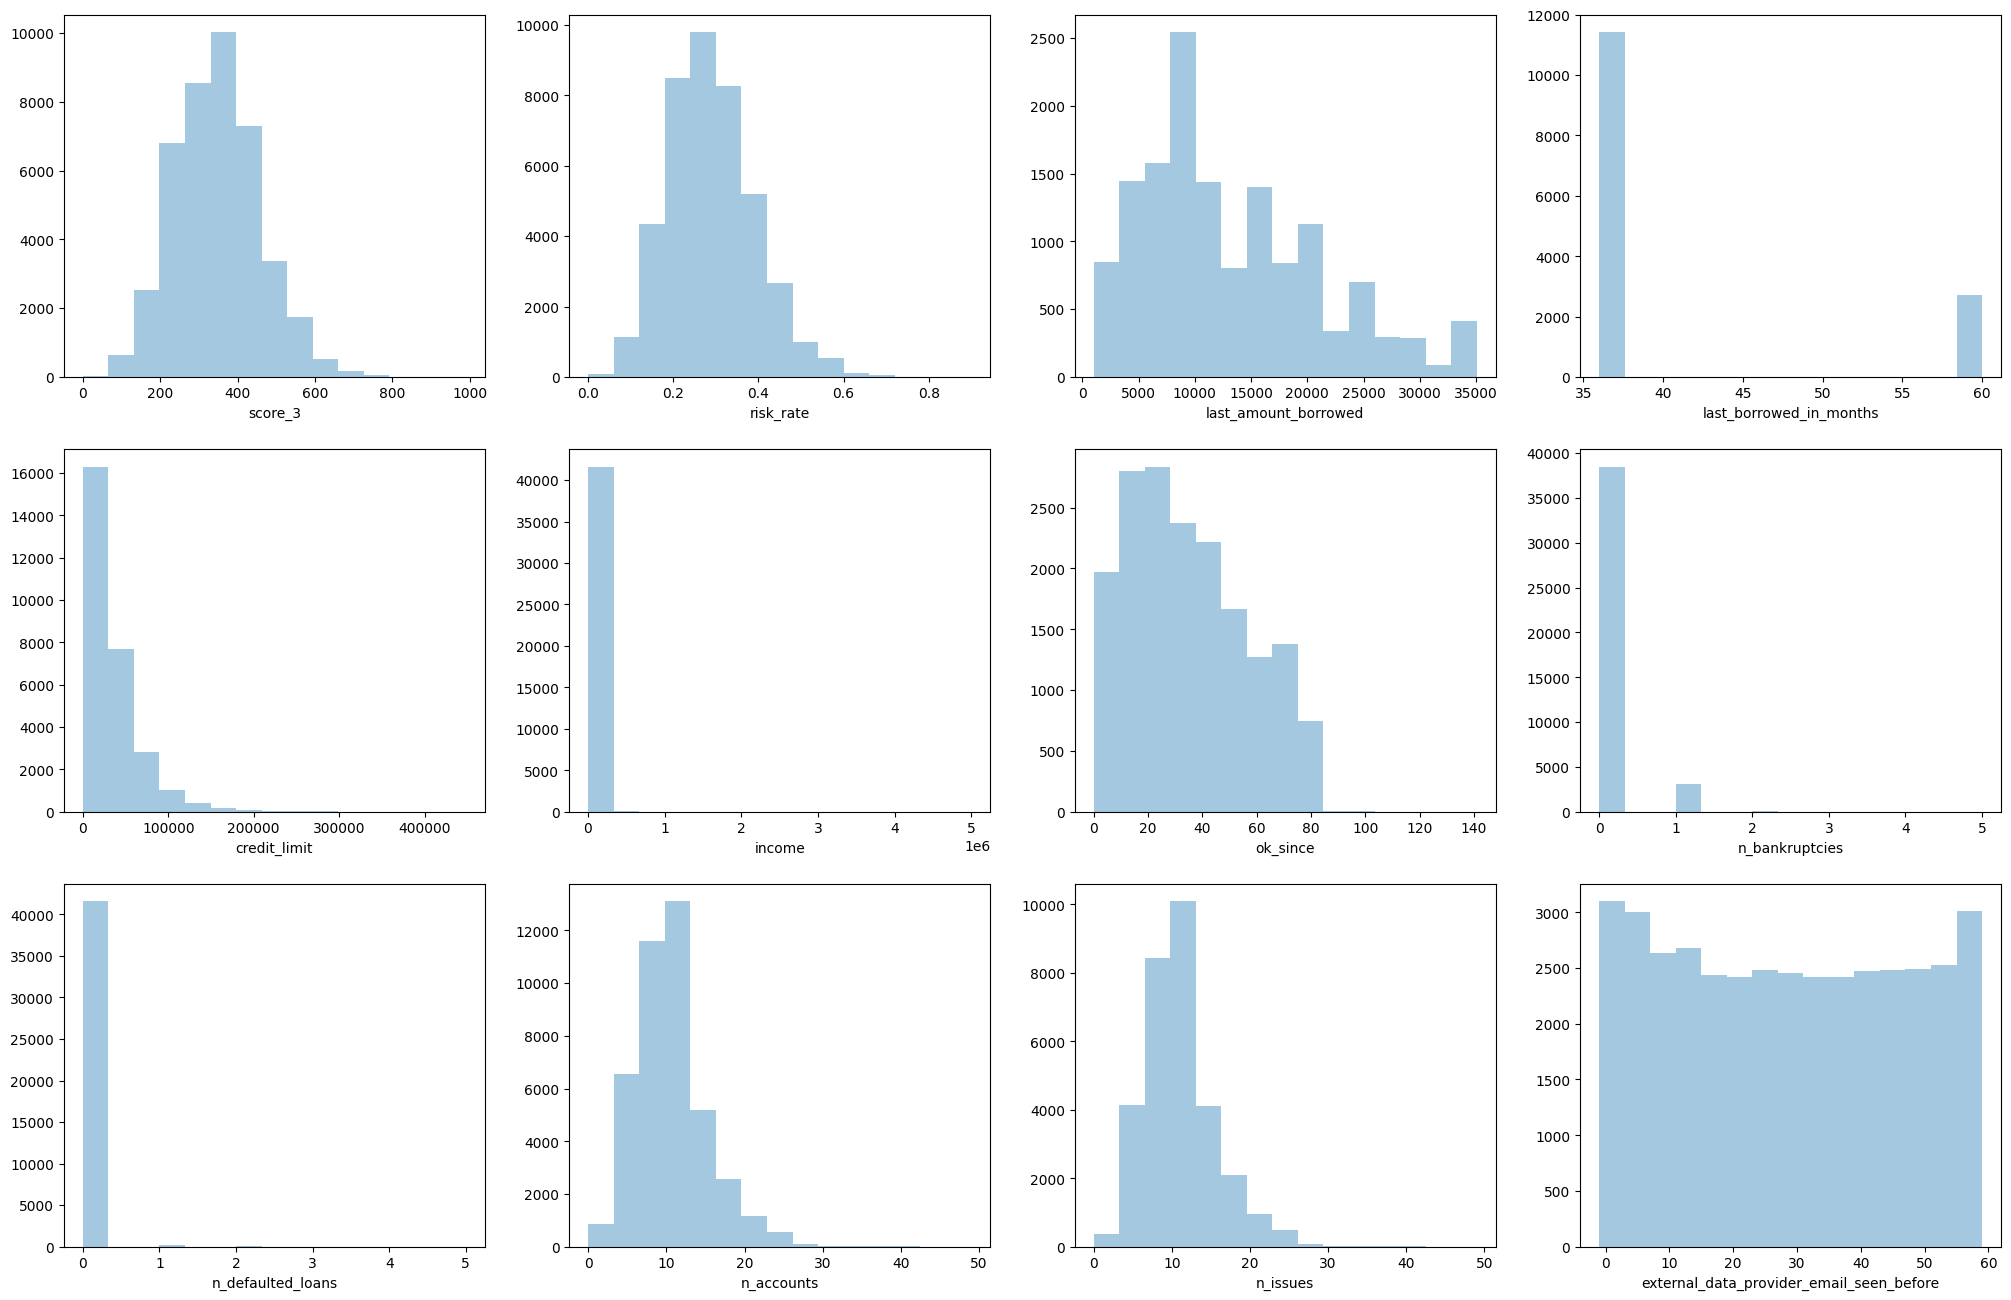

In [ ]:
# plot a histogram for each of the features above

nrows = 3
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in credit_data_numerical:
  sns.distplot(credit_data_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

In [ ]:
df_credit_num = credit_data.select_dtypes(exclude='object').columns
df_credit_cat = credit_data.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
credit_data['last_amount_borrowed'].fillna(value=0, inplace=True)
credit_data['last_borrowed_in_months'].fillna(value=0, inplace=True)
credit_data['n_issues'].fillna(value=0, inplace=True)

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(credit_data.loc[:, df_credit_num])
credit_data.loc[:, df_credit_num] = imputer.transform(credit_data.loc[:, df_credit_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(credit_data.loc[:, df_credit_cat])
credit_data.loc[:, df_credit_cat] = imputer.transform(credit_data.loc[:, df_credit_cat])

<ipython-input-60-62f6bd1517ec>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_data.loc[:, df_credit_num] = imputer.transform(credit_data.loc[:, df_credit_num])
<ipython-input-60-62f6bd1517ec>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_data.loc[:, df_credit_cat] = imputer.transform(credit_data.loc[:, df_credit_cat])


In [ ]:
credit_data.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [ ]:
bin_var = credit_data.nunique()[credit_data.nunique() == 2].keys().tolist()
num_var = [col for col in credit_data.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in credit_data.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = credit_data.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,0,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,0,0,0,0,0,1,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,0,0,0,0,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,0,0,1,0,0,0,0,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# feature matrix
X = df_credit_encoded.drop('target_default', axis=1)

# target vector
y = df_credit_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

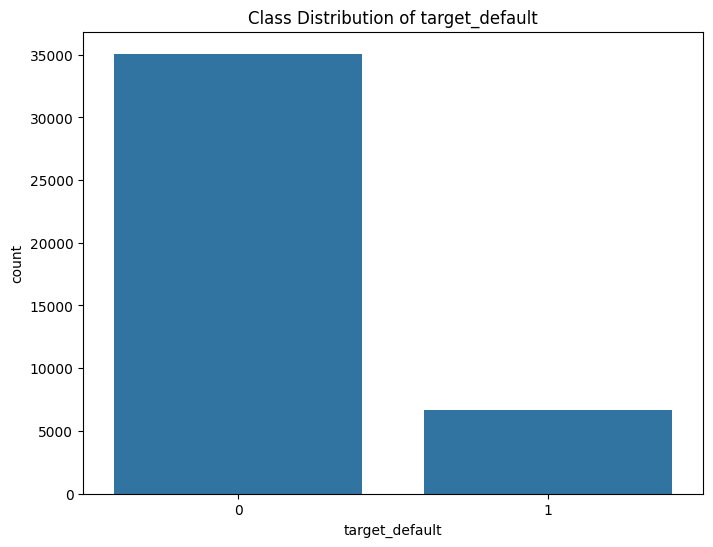

In [ ]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target_default', data=df_credit_encoded)
plt.title('Class Distribution of target_default')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
# Oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled_categorical = to_categorical(y_resampled)

In [ ]:
# Binary Classification deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_resampled, y_resampled, epochs=30, batch_size=32, validation_split=0.2)



Epoch 1/30
1316/1316 [==============================] - 3s 2ms/step - loss: 109878255616.0000 - accuracy: 0.5321 - val_loss: 415512821760.0000 - val_accuracy: 0.2525
Epoch 2/30
1316/1316 [==============================] - 2s 1ms/step - loss: 123036508160.0000 - accuracy: 0.5420 - val_loss: 52.4931 - val_accuracy: 0.5789
Epoch 3/30
1316/1316 [==============================] - 2s 1ms/step - loss: 43819433984.0000 - accuracy: 0.5389 - val_loss: 145.2227 - val_accuracy: 0.0084
Epoch 4/30
1316/1316 [==============================] - 2s 2ms/step - loss: 17243621376.0000 - accuracy: 0.5469 - val_loss: 26718369792.0000 - val_accuracy: 0.7796
Epoch 5/30
1316/1316 [==============================] - 2s 1ms/step - loss: 9741645824.0000 - accuracy: 0.5765 - val_loss: 4180070400.0000 - val_accuracy: 0.7802
Epoch 6/30
1316/1316 [==============================] - 2s 1ms/step - loss: 4023493888.0000 - accuracy: 0.5871 - val_loss: 7.4853 - val_accuracy: 0.0838
Epoch 7/30
1316/1316 [=====================

In [ ]:
# Test Evaluation
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

327/327 [==============================] - 0s 884us/step


In [ ]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[8144  627]
 [1417  248]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8771
           1       0.28      0.15      0.20      1665

    accuracy                           0.80     10436
   macro avg       0.57      0.54      0.54     10436
weighted avg       0.76      0.80      0.78     10436

Accuracy: 0.8041395170563435
